In [39]:
import numpy as np

Суммирование значений в массиве (и другие агрегатные функции)

In [40]:
rng = np.random.default_rng(1)
s = rng.random(12)

print(s)
print(sum(s))
print(np.sum(s))

a = np.array([
    [1, 2, 3, 4, 5],
    [6, 7, 8, 9, 10]
])

print(np.sum(a))
print(np.sum(a, axis=0))
print(np.sum(a, axis=1))

print(np.min(a))
print(np.min(a, axis=0)) # По столбцам
print(np.min(a, axis=1)) # По строкам

print(a.min())
print(a.min(0))
print(a.min(1))

# Nan - Not a number
print(np.nanmin(a)) # Для машинного обучения
print(np.nanmin(a, axis=0))
print(np.nanmin(a, axis=1))

[0.51182162 0.9504637  0.14415961 0.94864945 0.31183145 0.42332645
 0.82770259 0.40919914 0.54959369 0.02755911 0.75351311 0.53814331]
6.395963234865947
6.395963234865946
55
[ 7  9 11 13 15]
[15 40]
1
[1 2 3 4 5]
[1 6]
1
[1 2 3 4 5]
[1 6]
1
[1 2 3 4 5]
[1 6]


Транслирование (broadcasting)

Набор правил, которые позволяют осуществлять бинарные операции с массивами разных форм и размеров

In [41]:
a = np.array([0, 1, 2])
b = np.array([5 ,5 ,5])

print(a + b)
print(a + 5) # 5 транслируется в [5, 5, 5], т.е. подстраивается под размер массива a

a = np.array([[0, 1, 2], [3, 4, 5]])
print(a + 5)

a = np.array([0, 1, 2])
b = np.array([[0], [1], [2]])

print(a + b)

[5 6 7]
[5 6 7]
[[ 5  6  7]
 [ 8  9 10]]
[[0 1 2]
 [1 2 3]
 [2 3 4]]


Правила
1. Если размерности массива отличаются, то форма массива с меньшей размерностью дополняется 1 с левой стороны
2. Если формы массивов не совпадают в каком-то измерении, то если у массива форма равна 1, то он растягивается до соответствия формы второго массива
3. Если после применения этих правил в каком-либо измерении размеры отличаются и ни один из них не равен 1, то генерируется ошибка

In [42]:
a = np.array([[0, 1, 2], [3, 4, 5]])
b = np.array([5])

print(a.ndim, a.shape)
print(b.ndim, b.shape)

# a         (2, 3)
# b (1,) -> (1, 1) -> (2, 3)
print(a + b)

2 (2, 3)
1 (1,)
[[ 5  6  7]
 [ 8  9 10]]


In [43]:
a = np.ones((2, 3))
b = np.arange(3)

print(a)
print(b)

print(a.ndim, a.shape)
print(b.ndim, b.shape)

# (2, 3)   (2, 3)    (2, 3)
# (3, ) -> (1, 3) -> (2, 3)

c = a + b
print(c, c.shape)

[[1. 1. 1.]
 [1. 1. 1.]]
[0 1 2]
2 (2, 3)
1 (3,)
[[1. 2. 3.]
 [1. 2. 3.]] (2, 3)


In [44]:
a = np.arange(3).reshape((3, 1))
b = np.arange(3)

print(a)
print(b)

print(a.ndim, a.shape)
print(b.ndim, b.shape)

# (3, 1)   (3, 1) -> (3, 3)
# (3, ) -> (1, 3) -> (3, 3)

c = a + b

# [0 0 0]   [0 1 2]
# [1 1 1] + [0 1 2]
# [2 2 2]   [0 1 2]
print(c, c.shape)

a = np.ones((3, 2))
b = np.arange(3)

# 2 (3, 2)   (3, 2)    (3, 2)
# 1 (3, ) -> (1, 3) -> (3, 3)

""" c = a + b """

[[0]
 [1]
 [2]]
[0 1 2]
2 (3, 1)
1 (3,)
[[0 1 2]
 [1 2 3]
 [2 3 4]] (3, 3)


' c = a + b '

In [45]:
X = np.array([
    [1, 2, 3, 4, 5, 6, 7, 8, 9],
    [9, 8, 7, 6, 5, 4, 3, 2, 1]
])

Xmean0 = X.mean(0)
print(Xmean0)
Xcenter0 = X - Xmean0
print(Xcenter0)

Xmean1 = X.mean(1)
print(Xmean1)

Xmean1 = Xmean1[:, np.newaxis]

Xcenter1 = X - Xmean1
print(Xcenter1)

[5. 5. 5. 5. 5. 5. 5. 5. 5.]
[[-4. -3. -2. -1.  0.  1.  2.  3.  4.]
 [ 4.  3.  2.  1.  0. -1. -2. -3. -4.]]
[5. 5.]
[[-4. -3. -2. -1.  0.  1.  2.  3.  4.]
 [ 4.  3.  2.  1.  0. -1. -2. -3. -4.]]


(50, 50)


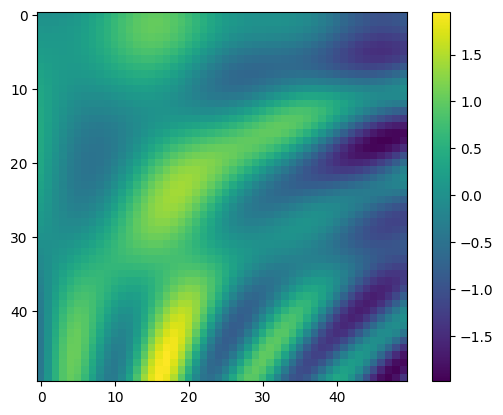

In [46]:
x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 50)[:, np.newaxis]

z = np.sin(x) ** 3 + np.cos(20 + y * x) * np.sin(y)

print(z.shape)

import matplotlib.pyplot as plt

plt.imshow(z)
plt.colorbar()
plt.show()

In [47]:
x = np.array([1, 2, 3, 4, 5])
y = np.array([[1, 2, 3, 4, 5], [6, 7, 8, 9, 10]])

print(x < 3)
print(np.less(x, 3))

# False = 0
# True = 1

print(np.sum(x < 3)) # Количество элементов
print(np.sum(y < 4, axis=0))
print(np.sum(y < 4, axis=1))
print(np.sum(y < 4))

[ True  True False False False]
[ True  True False False False]
2
[1 1 1 0 0]
[3 0]
3


Маски - буллевы массивы

In [48]:
x = np.array([1, 2, 3, 4, 5])
y = print(x < 3)

print(x[x < 3])

print(bin(42))
print(bin(59))
print(bin(42 & 59))

[ True  True False False False]
[1 2]
0b101010
0b111011
0b101010


Векторизация индекса

In [49]:
x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
index = [1, 5, 7]

print(x[index])

index = [[1, 5, 7], [2, 4, 8]]
print(x[index])

[1 5 7]
[[1 5 7]
 [2 4 8]]


Форма результата отражает форму массива индексов, а не форму исходного массива

In [50]:
x = np.arange(12).reshape((3, 4))

print(x)
print(x[2])
print(x[2, [2, 0, 1]])
print(x[1: , [2, 0, 1]])

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[ 8  9 10 11]
[10  8  9]
[[ 6  4  5]
 [10  8  9]]


In [51]:
x = np.arange(10)
i = np.array([2, 1, 8, 4])

print(x)
x[i] = 999

print(x)

[0 1 2 3 4 5 6 7 8 9]
[  0 999 999   3 999   5   6   7 999   9]


Сортировка

In [52]:
x = [3, 2, 3, 5, 2, 6, 7, 3, 6, 3, 2]

print(sorted(x))
print(np.sort(x))

[2, 2, 2, 3, 3, 3, 3, 5, 6, 6, 7]
[2 2 2 3 3 3 3 5 6 6 7]


Структурированные массивы

In [53]:
data = np.zeros(4, dtype = {
    'names': (
        'name', 'age'
    ),
    'formats': (
        'U10', 'i4'
    )
})

print(data.dtype)

name = ['name1', 'name2', 'name3', 'name4']
age = [10, 20, 30, 40]

data['name'] = name
data['age'] = age

print(data)

print(data['age'] > 20)
print(data[data['age'] > 20]['name'])

[('name', '<U10'), ('age', '<i4')]
[('name1', 10) ('name2', 20) ('name3', 30) ('name4', 40)]
[False False  True  True]
['name3' 'name4']


Массивы записей

In [54]:
data_rec = data.view(np.recarray)
print(data_rec)
print(data_rec[0])
print(data_rec[-1].name)

[('name1', 10) ('name2', 20) ('name3', 30) ('name4', 40)]
('name1', 10)
name4
